<a href="https://colab.research.google.com/github/mb16biswas/heart-disease-classifier/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***processing the data ***

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
#/content/drive/MyDrive/heart-disease-problem.csv

df = pd.read_csv("/content/drive/MyDrive/heart-disease-problem.csv")

In [75]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)  #it shuffle the total data set 

In [76]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [78]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


1 = heart disease present, 0 = no heart disease. And for sex, 1 = male, 0 = female.

In [80]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

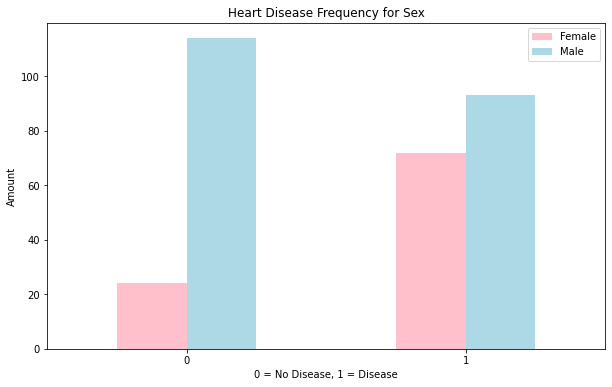

In [82]:
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(10,6), color=["pink", "lightblue"])

# Add some attributes to it
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female", "Male"])
plt.xticks(rotation=0);

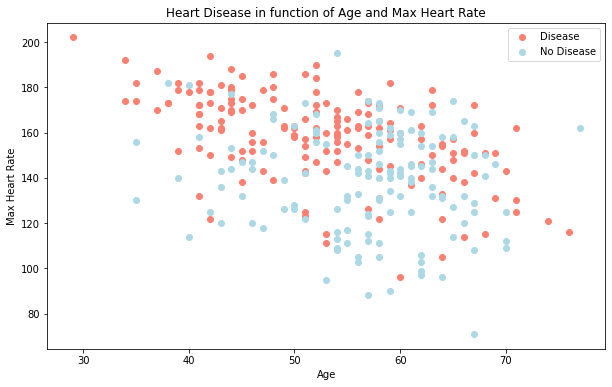

In [83]:
plt.figure(figsize=(10,6))

# Start with positve examples
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="salmon") # define it as a scatter figure

# Now for negative examples, we want them on the same plot, so we call plt again
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="lightblue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

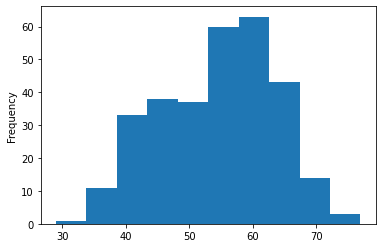

In [84]:
# Histograms are a great way to check the distribution of a variable
df.age.plot.hist();

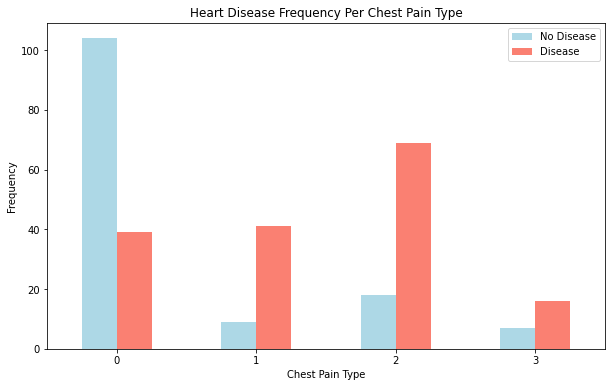

In [85]:

# Create a new crosstab and base plot
pd.crosstab(df.cp, df.target).plot(kind="bar", 
                                   figsize=(10,6), 
                                   color=["lightblue", "salmon"])

# Add attributes to the plot to make it more readable
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation = 0);

Creating the model

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [87]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,57,1,0,150,276,0,0,112,1,0.6,1,1,1,0
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
2,57,1,2,150,126,1,1,173,0,0.2,2,1,3,1
3,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
4,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


In [88]:
X = df.drop("target" , axis= 1 )
y = df["target"]

In [89]:
X = np.array(X)
y = np.array(y)

In [90]:
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2) 

In [91]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((242, 13), (61, 13), (242,), (61,))

{LogisticRegression ,
KNeighborsClassifier ,
RandomForestClassifier} 
comparing this 3 models 

In [92]:
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}


def fit_and_score(models, X_train, X_test, y_train, y_test):
  
    
    # Random seed for reproducible results
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [93]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'KNN': 0.5901639344262295,
 'Logistic Regression': 0.8688524590163934,
 'Random Forest': 0.7868852459016393}

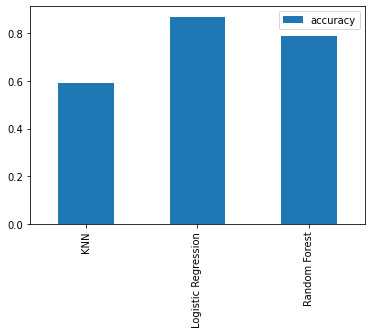

In [94]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();

# **since knn score is low as compare to the other , we eliminate the knn **

*Tuning models*


Grid Search can be thought of as an exhaustive search for selecting a model. In Grid Search, the data scientist sets up a grid of hyperparameter values and for each combination, trains a model and scores on the testing data. In this approach, every combination of hyperparameter values is tried which can be very inefficient. For example, searching 20 different parameter values for each of 4 parameters will require 160,000 trials of cross-validation. This equates to 1,600,000 model fits and 1,600,000 predictions if 10-fold cross validation is used. While Scikit Learn offers the GridSearchCV function to simplify the process, it would be an extremely costly execution both in computing power and time.
By contrast, Random Search sets up a grid of hyperparameter values and selects random combinations to train the model and score. This allows you to explicitly control the number of parameter combinations that are attempted. The number of search iterations is set based on time or resources. Scikit Learn offers the RandomizedSearchCV function for this process.

https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85

In [113]:
#randomized searchcv 

# Different LogisticRegression hyperparameters
log_reg_grid = { "penalty" : ["l1", "l2" , "elasticnet", "none"],
                "C": np.logspace(-4, 4, 20),
                "intercept_scaling" : [1.0 , 2.0 , 3.0],
                "solver": ["newton-cg", "lbfgs", "saga"]}

# Different RandomForestClassifier hyperparameters
rf_grid = {
           "n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

In [114]:
np.random.seed(43)


rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)


rs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
 

In [115]:
rs_log_reg.score(X_test , y_test)

0.8524590163934426

In [98]:

# Setup random seed
np.random.seed(42)

# Setup random hyperparameter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparameter search model
rs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.3min finished


In [99]:
rs_rf.score(X_test , y_test)

0.8360655737704918

In [100]:
#GridSearchCV


log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [101]:
gs_log_reg.score(X_test , y_test)

0.8360655737704918

In [102]:
rf_grid1 = {
           "n_estimators": [10,30,50],
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": [2,6,10],
           "min_samples_leaf": [4,8]}

In [103]:
gs_rf = GridSearchCV(RandomForestClassifier(),
                          param_grid=rf_grid1,
                          cv=5,
                          verbose=True)

gs_rf.fit(X_train, y_train);

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   17.4s finished


In [104]:
gs_rf.score(X_test , y_test)

0.819672131147541

so we use rs_log_reg model 


In [106]:
y_preds = rs_log_reg.predict(X_test)  

**ROC Curve and AUC Scores**

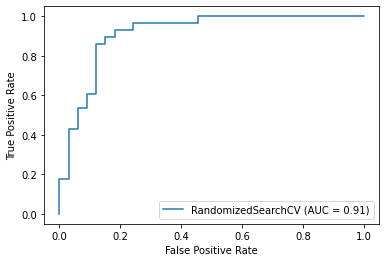

In [108]:
from sklearn.metrics import plot_roc_curve

# Plot ROC curve and calculate AUC metric
plot_roc_curve(rs_log_reg, X_test, y_test);

**Confusion matrix**

In [109]:
print(confusion_matrix(y_test, y_preds))

[[25  8]
 [ 1 27]]


In [110]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.76      0.85        33
           1       0.77      0.96      0.86        28

    accuracy                           0.85        61
   macro avg       0.87      0.86      0.85        61
weighted avg       0.87      0.85      0.85        61



# ***prediction on other csv files from local machine***

In [111]:
#prediction for costume csv files 
 

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
df 

for fn in uploaded.keys():
 
  
  path = '/content/' + fn
  df = pd.read_csv(path)
  df = np.array(df)
  pred = gs_log_reg.predict(df)
  print(pred)





 

Saving heart-test-data.csv to heart-test-data (4).csv
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1]
